In [61]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')
pd.set_option("display.max_columns", len(df.columns))


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,18,24,25,26,28,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
def nutrint_info_detail(df, country, nutrient):
    country_df = df[(df['countries_en'] == country)][(nutrient + '_100g')]
    num_null = len(country_df[country_df.isnull()])
    nutrient_list = list(country_df[country_df.notnull()])     
    num_not_null = len(nutrient_list)
    
    perc_not_null = num_not_null/(num_not_null+num_null)
    
    if len(nutrient_list) == 0:
        nutrient_mean = 999999
    else:
        nutrient_mean = np.mean(nutrient_list)
        
    return nutrient_mean, num_null, num_not_null, perc_not_null

In [63]:
country_list = []
for country in list(df['countries_en'].unique()):
    try:
        if len(country.split(',')) == 1:
            country_list.append(country)
    except:
        print('Error:', country)
        
all_country_dict = {}
for country in country_list:
    all_country_dict[country] = list(df[df['countries_en'] == country]['countries'].unique())

Error: nan


In [0]:
nutrient_dict = {}
for country in list(all_country_dict.keys()):
    nutrient_dict[country] = []

# Create a list of nutrients of interest
nutrients = ['sugars', 'proteins', 'fat']

# Fill in the empty dictionary with all nurition info and entry counts per country
for nutrient in nutrients:
    for country in list(all_country_dict.keys()):
        nutrient_dict[country] = nutrient_dict[country] + list(nutrint_info_detail(df, country, nutrient))

In [0]:
df_columns = []
for nutrient in nutrients:
    df_columns = df_columns + [str('avg_' + nutrient),
                               str(nutrient + '_nulls'),
                               str(nutrient + '_not_nulls'),
                               str(nutrient + '_perc_not_nulls')]
    
# Transform the dictionary into a dataframe and display
df_nutri = pd.DataFrame.from_dict(nutrient_dict).T
df_nutri = df_nutri.reset_index(drop=False)
df_nutri.columns = ['country'] + df_columns



In [0]:
clean_df = df_nutri[np.logical_not((df_nutri == 999999).any(1))]

In [0]:
drop_countries = ['European Union', 'Other-japon', 'Other-turquie',
                  'World','fr:Quebec', 'الإمارات-العربية-المتحدة' ,'السعودية' ,'تونس', 'سلطنة-عمان', 'لبنان', '香港']

clean_df = clean_df[np.logical_not(clean_df['country']\
                                                         .isin(drop_countries))]

In [0]:
final_df_nutri = clean_df[(clean_df['sugars_not_nulls'] > 150) 
                                        & (clean_df['proteins_not_nulls'] > 150)
                                        & (clean_df['fat_not_nulls'] > 150)]


In [69]:
final_df_nutri

,country,avg_sugars,sugars_nulls,sugars_not_nulls,sugars_perc_not_nulls,avg_proteins,proteins_nulls,proteins_not_nulls,proteins_perc_not_nulls,avg_fat,fat_nulls,fat_not_nulls,fat_perc_not_nulls
0,France,15.414204,214.0,245.0,0.533769,7.101797,213.0,246.0,0.535948,12.863688,260.0,199.0,0.433551
1,United States,15.954133,2163.0,23241.0,0.914856,6.682136,378.0,25026.0,0.985120,12.417378,330.0,25074.0,0.987010


In [0]:
x = final_df_nutri.iloc(0)

In [0]:
france  = x[0]
US = x[1]

In [72]:
france[0]

'France'

In [73]:
US[1:]

avg_sugars                  15.9541
sugars_nulls                   2163
sugars_not_nulls              23241
sugars_perc_not_nulls      0.914856
avg_proteins                6.68214
proteins_nulls                  378
proteins_not_nulls            25026
proteins_perc_not_nulls     0.98512
avg_fat                     12.4174
fat_nulls                       330
fat_not_nulls                 25074
fat_perc_not_nulls          0.98701
Name: 1, dtype: object

Text(0, 0.5, 'Nutrient Info')

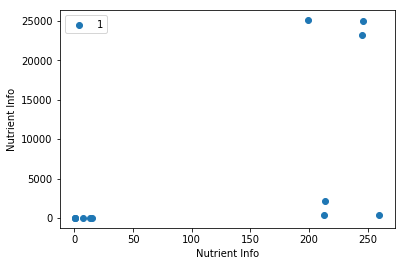

In [74]:
f = france[0]
us = US[0]
f_info = france[1:]
us_info= US[1:]
plt.scatter(f_info, us_info)

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Nutrient Info')
plt.ylabel('Nutrient Info')

# Correlation between average nutrition informaton of top 2 countries,France and US